In [3]:
from Solvers import *
from TestProblems import *
from PlotFunctions import *
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Dormand-Prince

## Stability plot

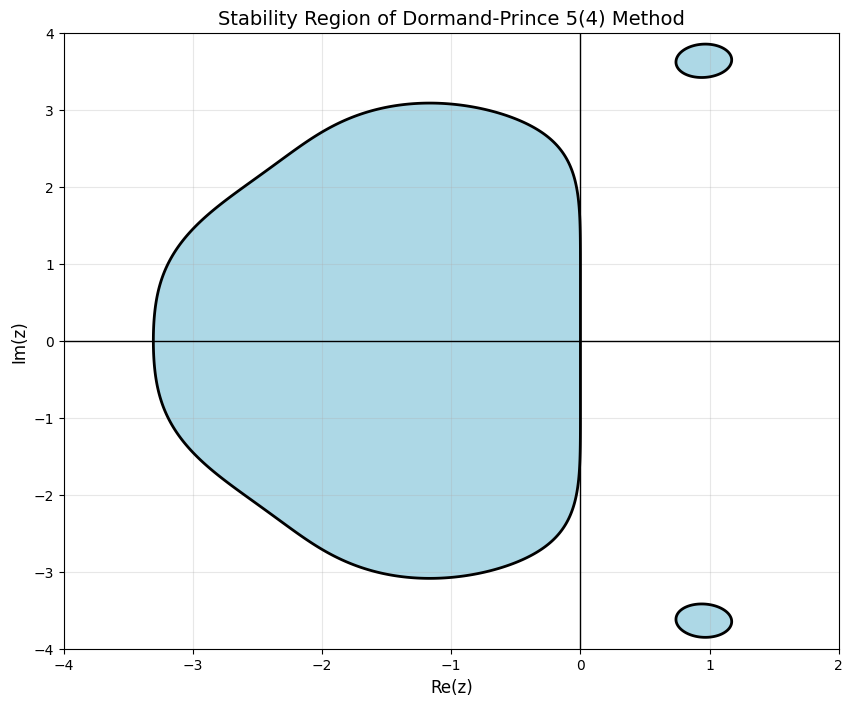

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def dp54_stability_function(z):
    """Stability function for Dormand-Prince 5(4) method"""
    return 1 + z + z**2/2 + z**3/6 + z**4/24 + z**5/120 + z**6/600

def plot_stability_region():
    # Create grid in complex plane
    x = np.linspace(-4, 2, 500)
    y = np.linspace(-4, 4, 500)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Compute stability function magnitude
    R = np.abs(dp54_stability_function(Z))
    
    # Create figure
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, R, levels=[0, 1], colors=['lightblue'])
    plt.contour(X, Y, R, levels=[1], colors='black', linewidths=2)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.title('Stability Region of Dormand-Prince 5(4) Method', fontsize=14)
    plt.xlabel('Re(z)', fontsize=12)
    plt.ylabel('Im(z)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    plot_stability_region()

## Test on test problems

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:491: RuntimeWarning: divide by zero encountered in scalar divide
  h = min(hmax, max(hmin, 0.9 * h * (epstol / r)**0.2))


<Figure size 1600x1200 with 0 Axes>

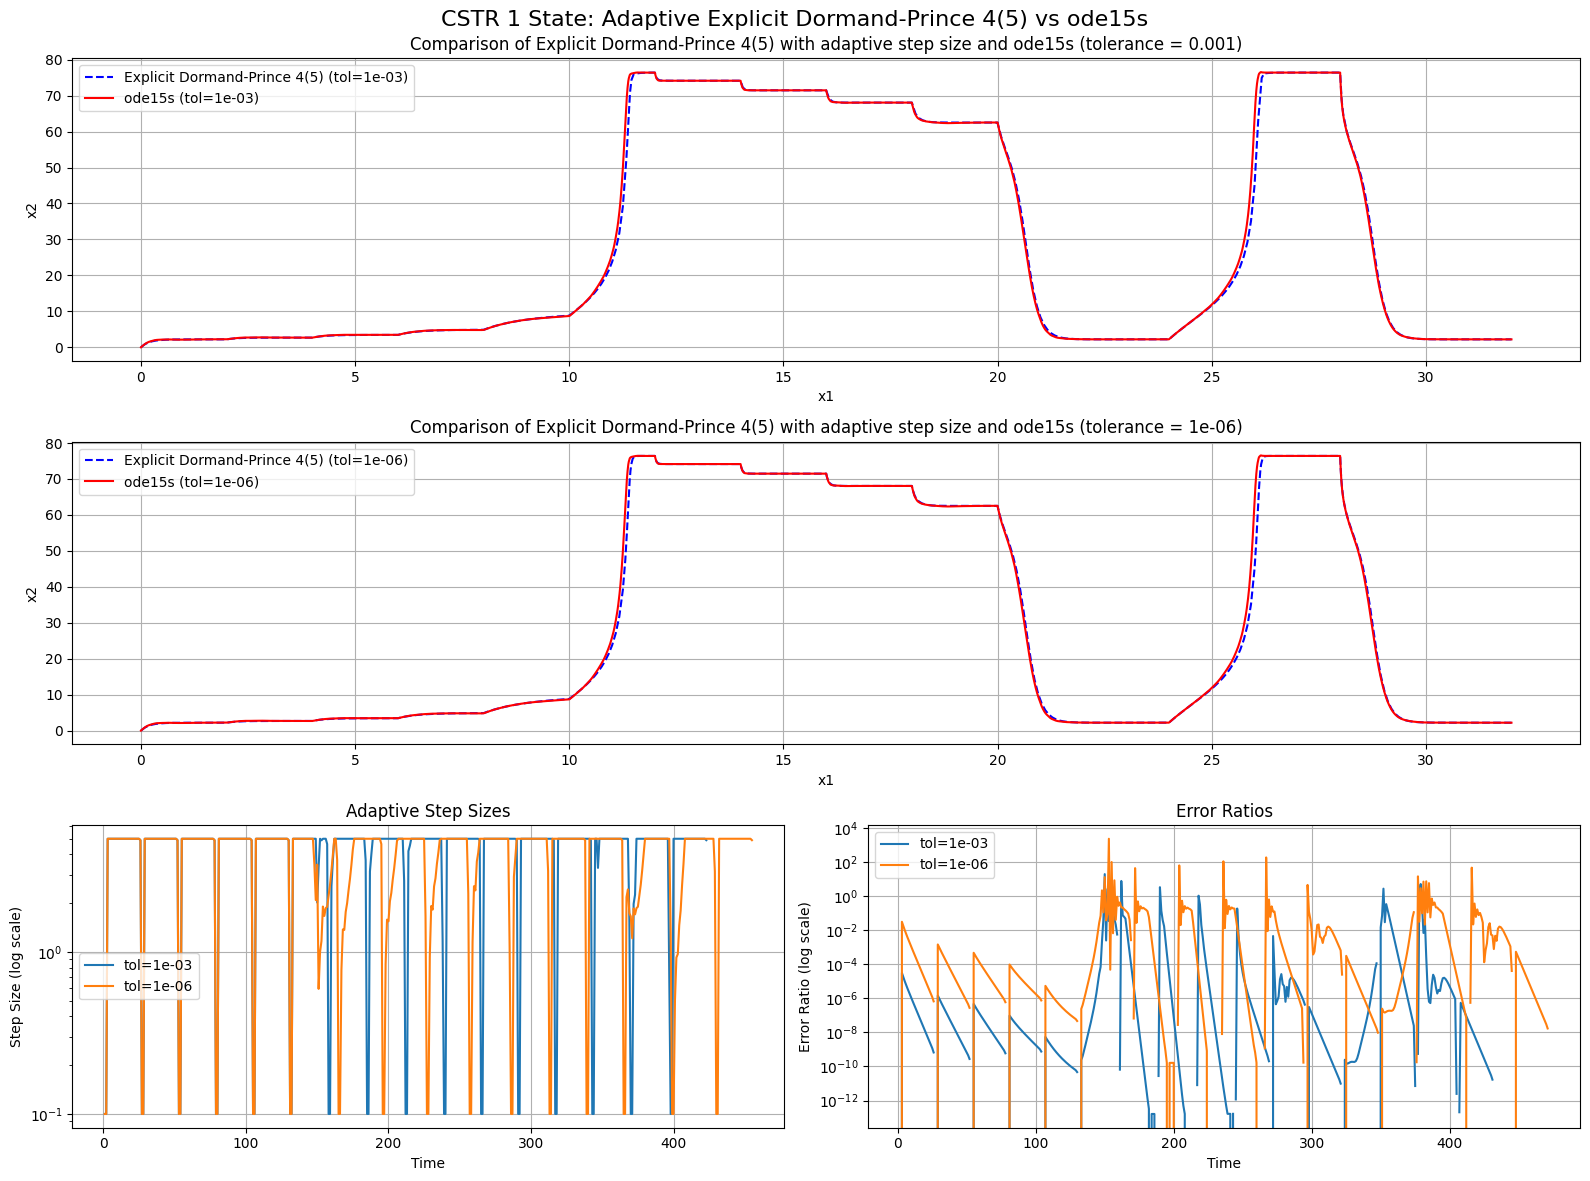

In [4]:
t_span = (0, 120)
cstr_dopri_adaptive = compare_solvers_cstr(CSTR_1state_model, t_span, model_name="CSTR 1 State", reference_solver_name = "ode15s", adaptive_steps= True, explicit=True, dopri=True, steptype = "adaptive", reference_solver="BDF")

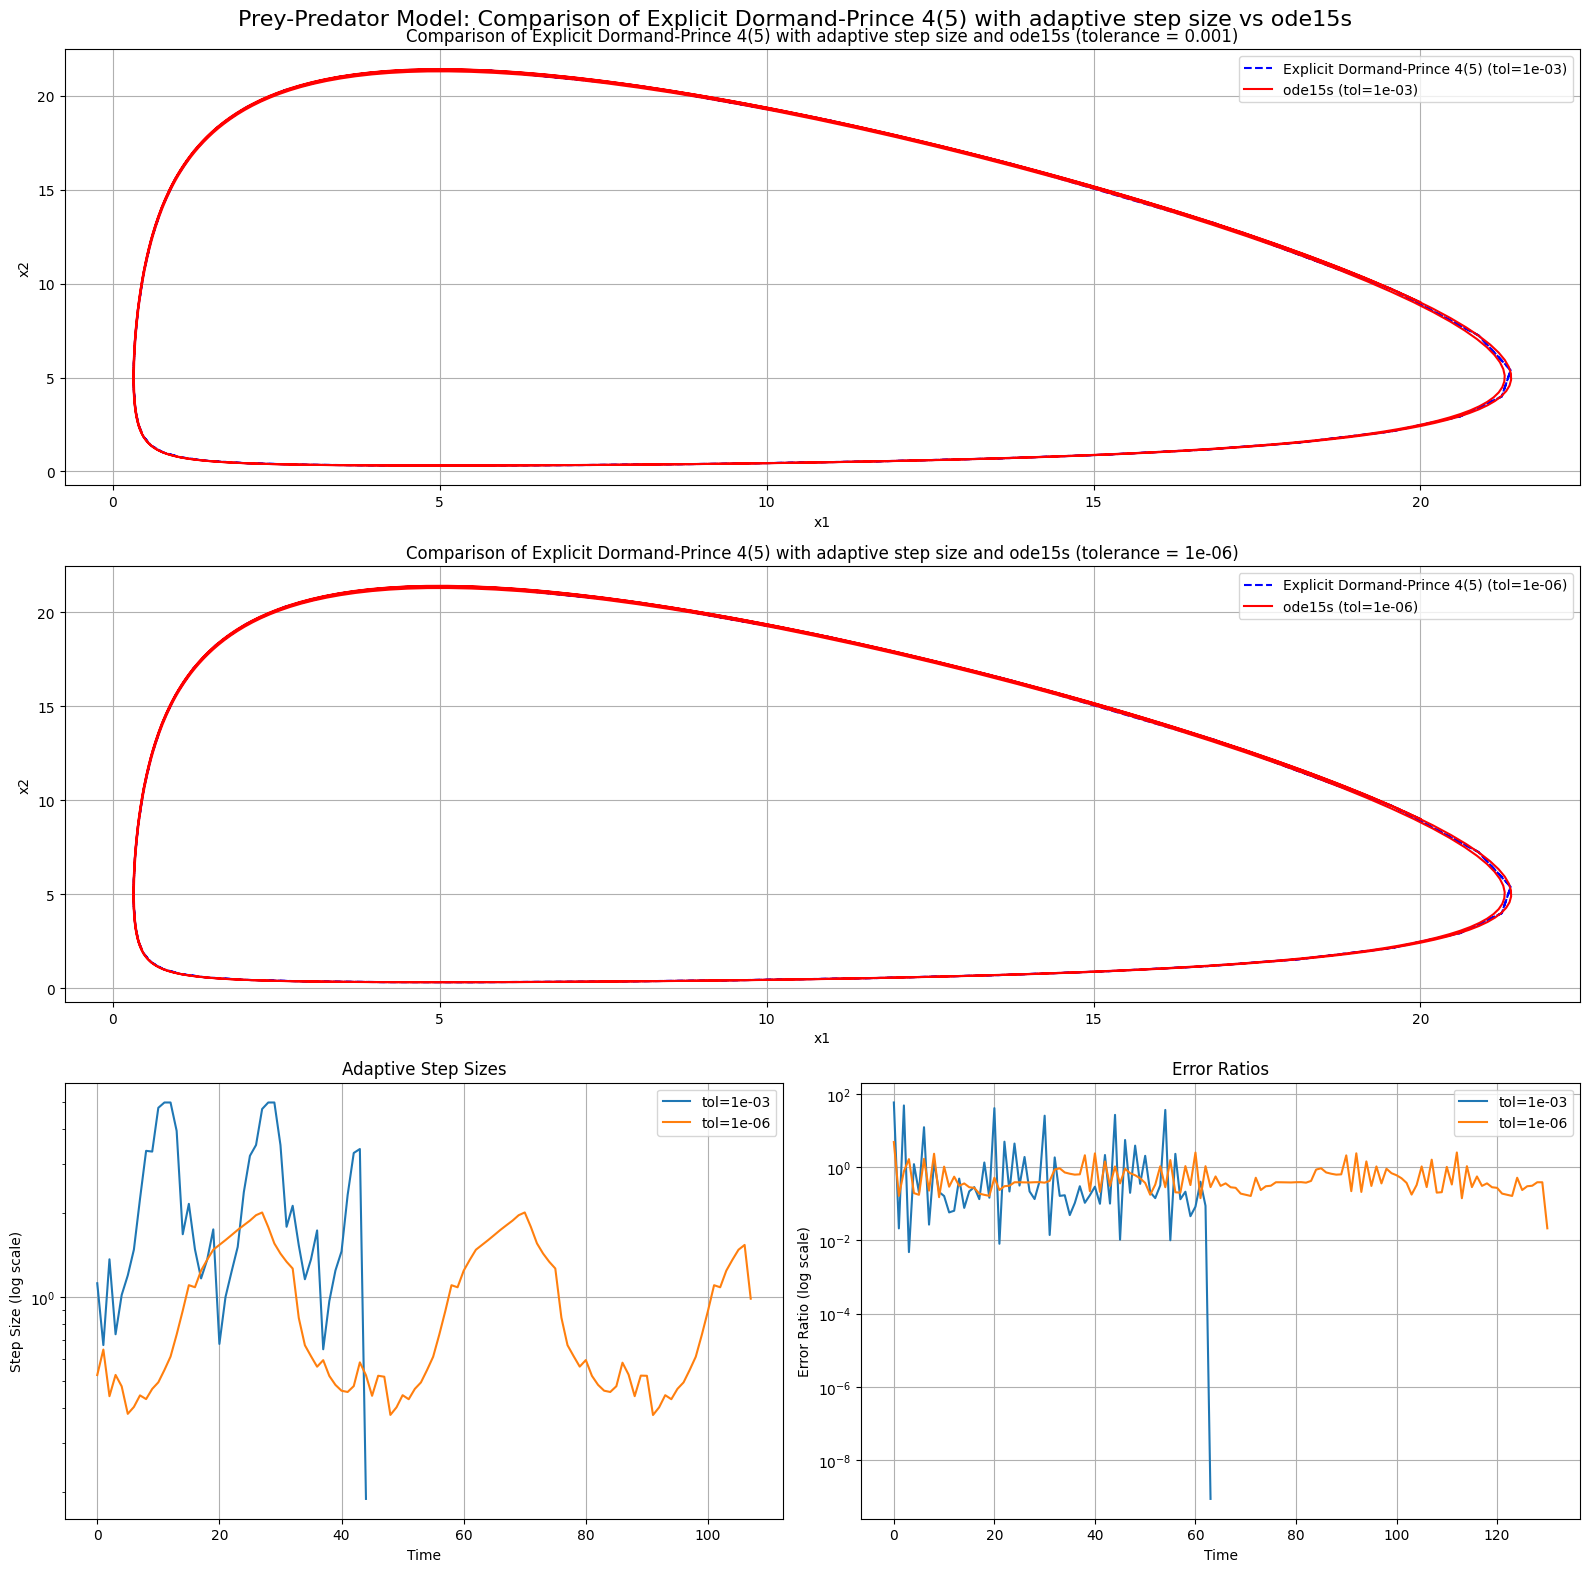

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:491: RuntimeWarning: divide by zero encountered in scalar divide
  h = min(hmax, max(hmin, 0.9 * h * (epstol / r)**0.2))


<Figure size 1600x1200 with 0 Axes>

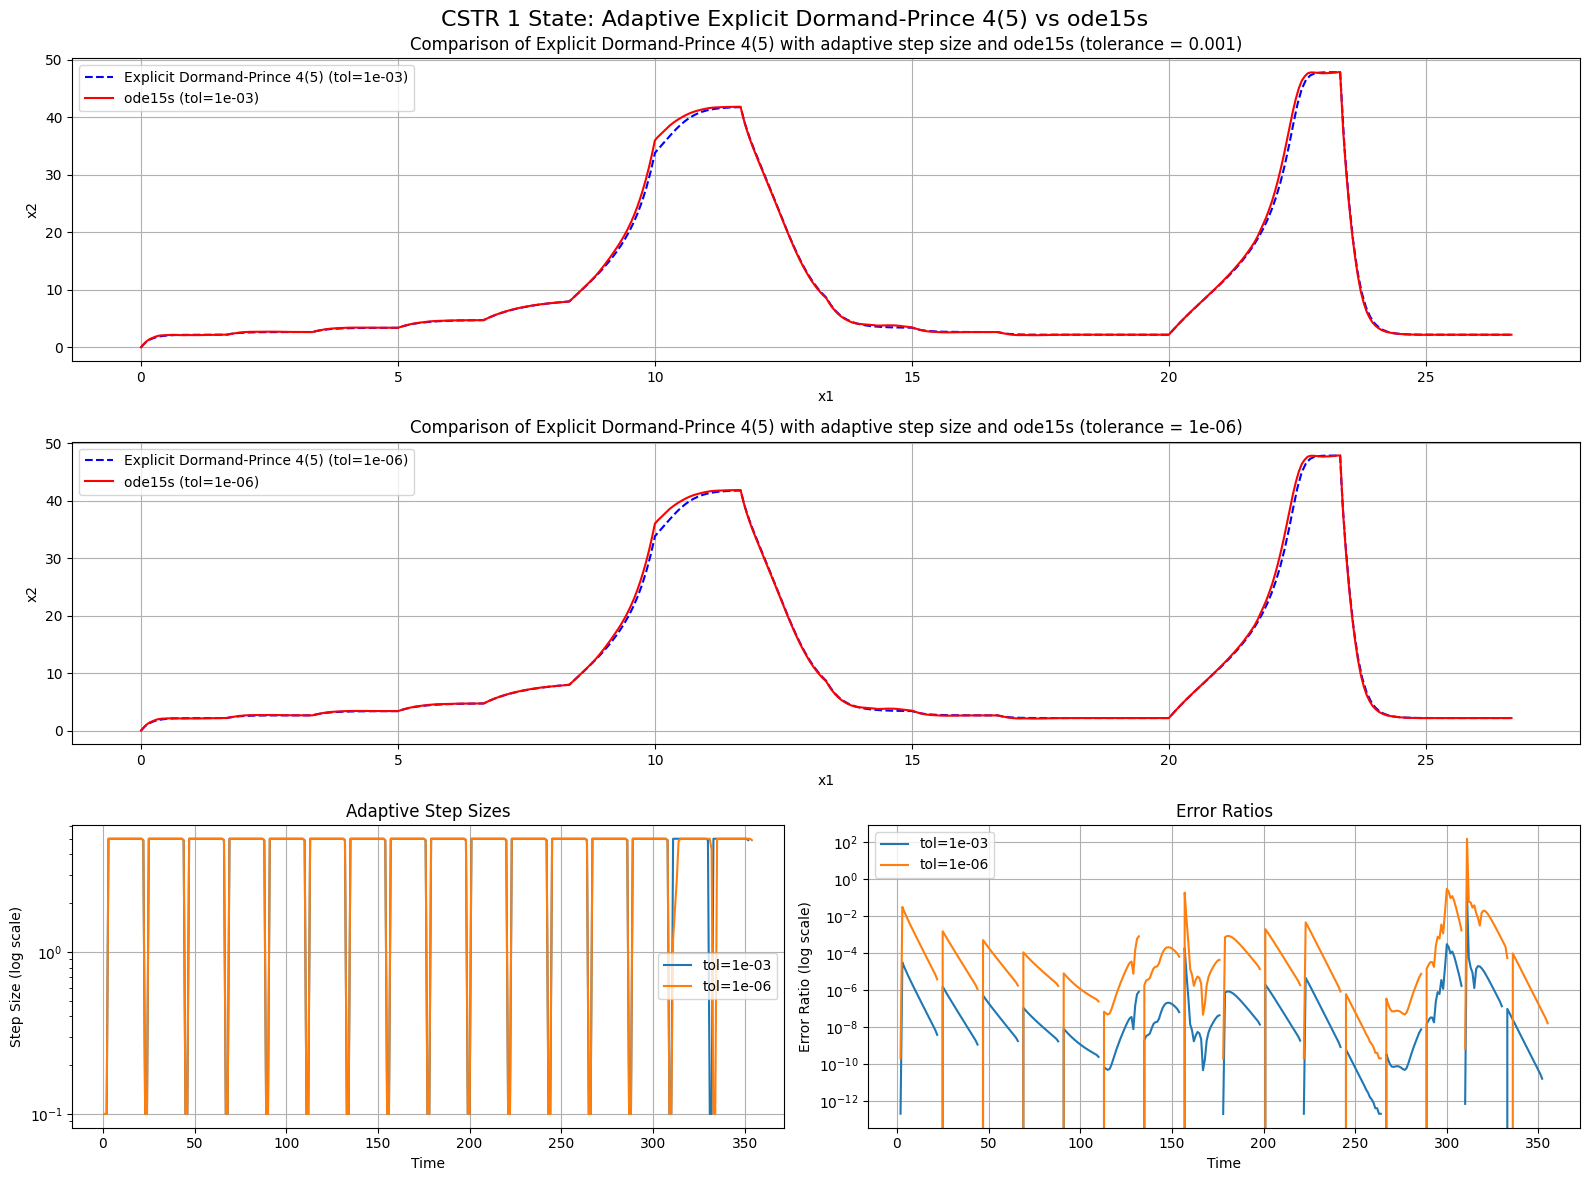

In [ ]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate
pp_dpori_adaptive = compare_solvers(prey_predator_model, t_span, x0, params=(a, b), model_name="Prey-Predator Model", reference_solver_name = "ode15s", adaptive_steps= True, explicit=True, dopri=True, steptype = "adaptive", reference_solver="BDF")


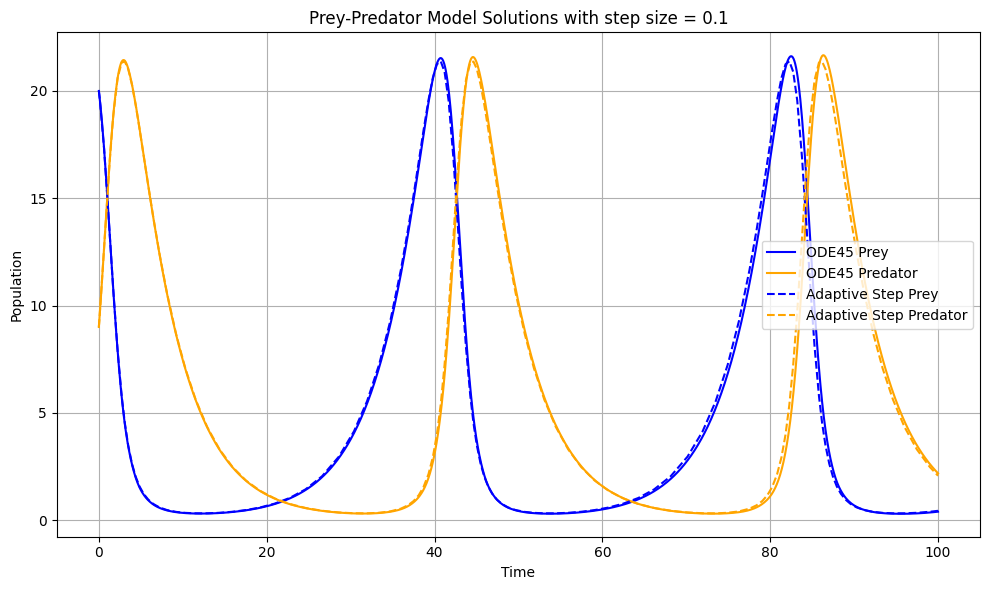

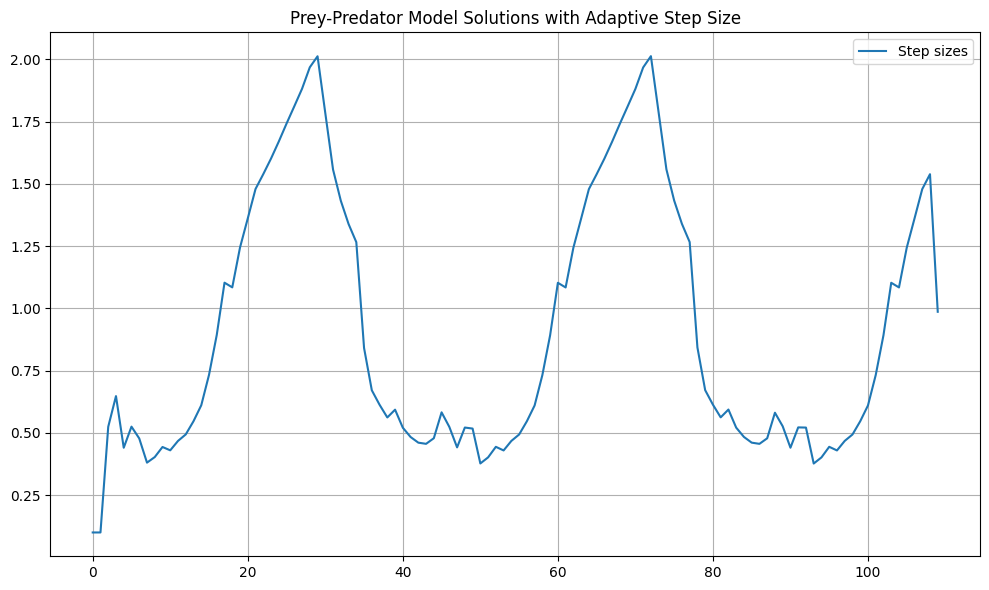

In [5]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, _ = prey_predator_model(a, b)

N = 1000
h0 = (t_span[1] - t_span[0]) / N

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using Explicit Euler with fixed step size


solver = dormand_prince_45()

abs_tol = 1e-6
rel_tol = 1e-6

solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='Adaptive Step Prey', linestyle='--', color='blue')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='Adaptive Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Plot the stepsizes in solution_adaptive_h
plt.figure(figsize=(10, 6))
plt.plot(solution_adaptive_h, label = 'Step sizes')
plt.title('Prey-Predator Model Solutions with Adaptive Step Size')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


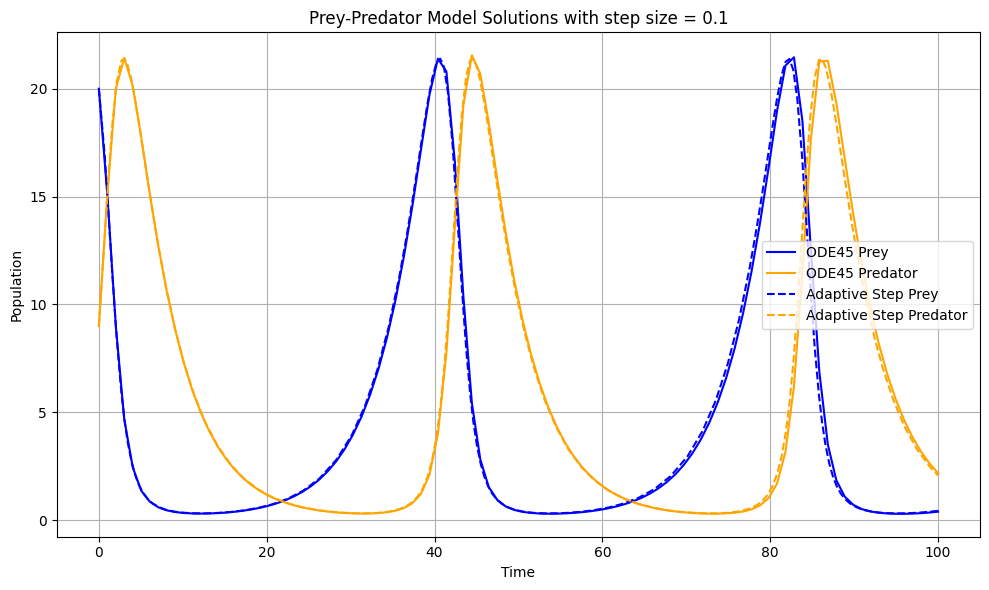

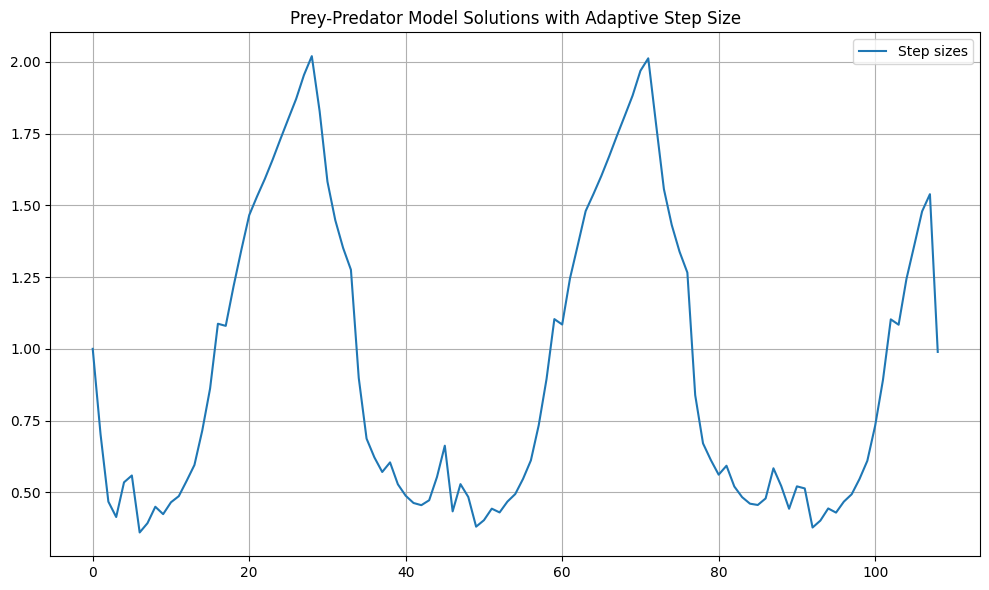

In [6]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, _ = prey_predator_model(a, b)

N = 100
h0 = (t_span[1] - t_span[0]) / N

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using Explicit Euler with fixed step size


solver = dormand_prince_45()

abs_tol = 1e-6
rel_tol = 1e-6

solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='Adaptive Step Prey', linestyle='--', color='blue')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='Adaptive Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Plot the stepsizes in solution_adaptive_h
plt.figure(figsize=(10, 6))
plt.plot(solution_adaptive_h, label = 'Step sizes')
plt.title('Prey-Predator Model Solutions with Adaptive Step Size')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:455: RuntimeWarning: divide by zero encountered in scalar divide
  h = min(hmax, max(hmin, 0.9 * h * (epstol / r)**0.2))


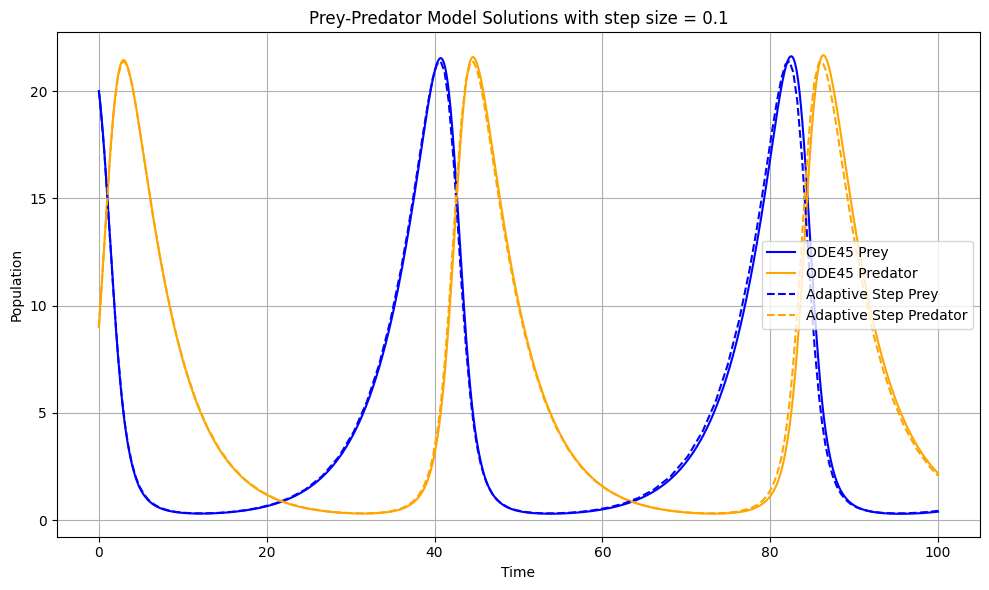

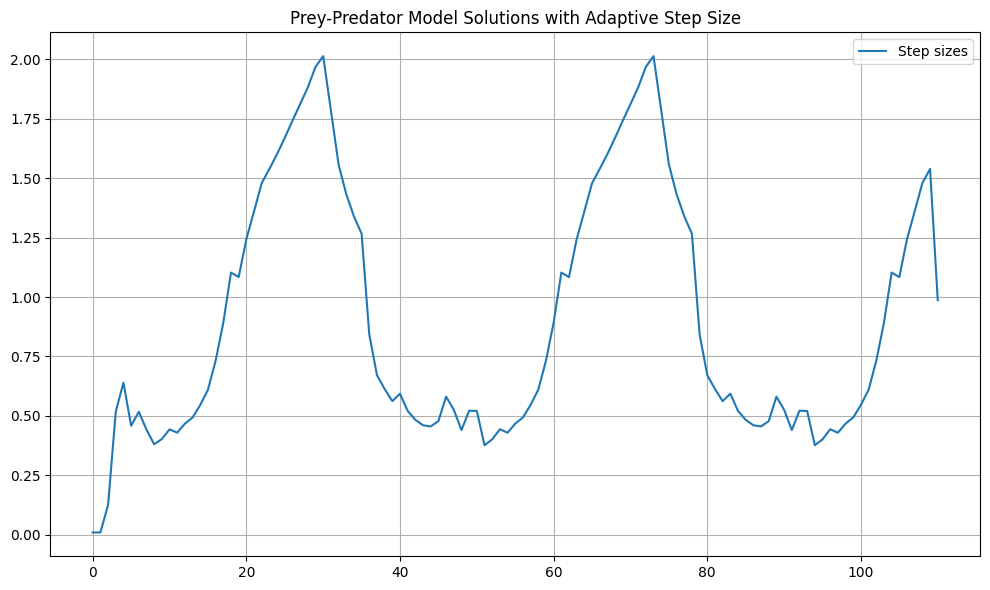

In [7]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, _ = prey_predator_model(a, b)

N = 10000
h0 = (t_span[1] - t_span[0]) / N

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using Explicit Euler with fixed step size


solver = dormand_prince_45()

abs_tol = 1e-6
rel_tol = 1e-6

solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='Adaptive Step Prey', linestyle='--', color='blue')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='Adaptive Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Plot the stepsizes in solution_adaptive_h
plt.figure(figsize=(10, 6))
plt.plot(solution_adaptive_h, label = 'Step sizes')
plt.title('Prey-Predator Model Solutions with Adaptive Step Size')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Van der Pol

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:35: RuntimeWarning: overflow encountered in scalar multiply
  dydt = mu * (1 - x**2) * y - x
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:35: RuntimeWarning: overflow encountered in scalar power
  dydt = mu * (1 - x**2) * y - x
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  dydt = mu * (1 - x**2) * y - x


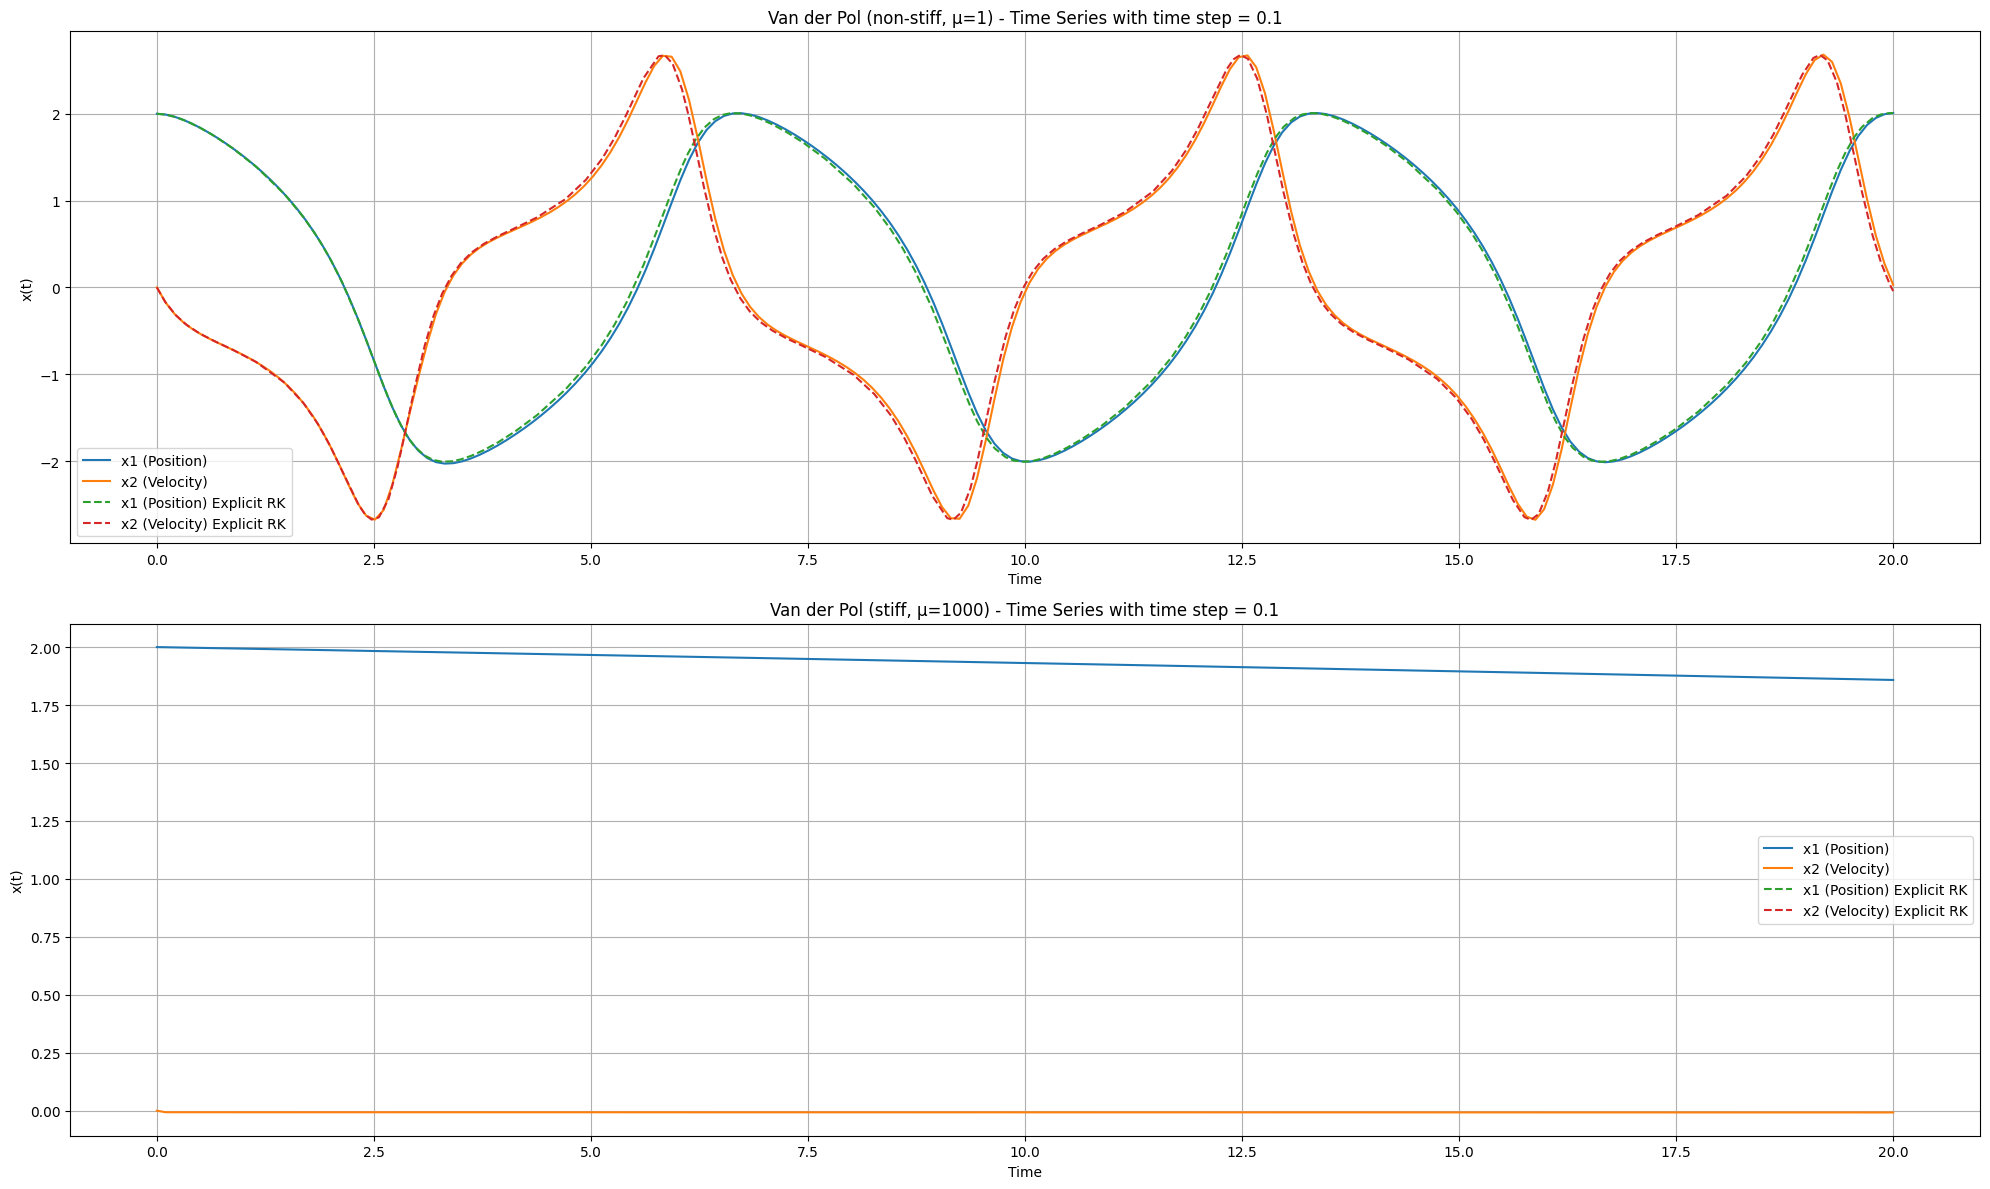

In [8]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 200
h0 = (t_span[1] - t_span[0]) / N


abs_tol = 1e-6
rel_tol = 1e-6

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x, solution_fixed_nonstiff_h = ExplicitRungeKuttaSolverAdaptive(f_nonstiff, t_span, x0, h0, solver, abs_tol, rel_tol)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x, solution_fixed_stiff_h = ExplicitRungeKuttaSolverAdaptive(f_stiff, t_span, x0, h0, solver, abs_tol, rel_tol)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

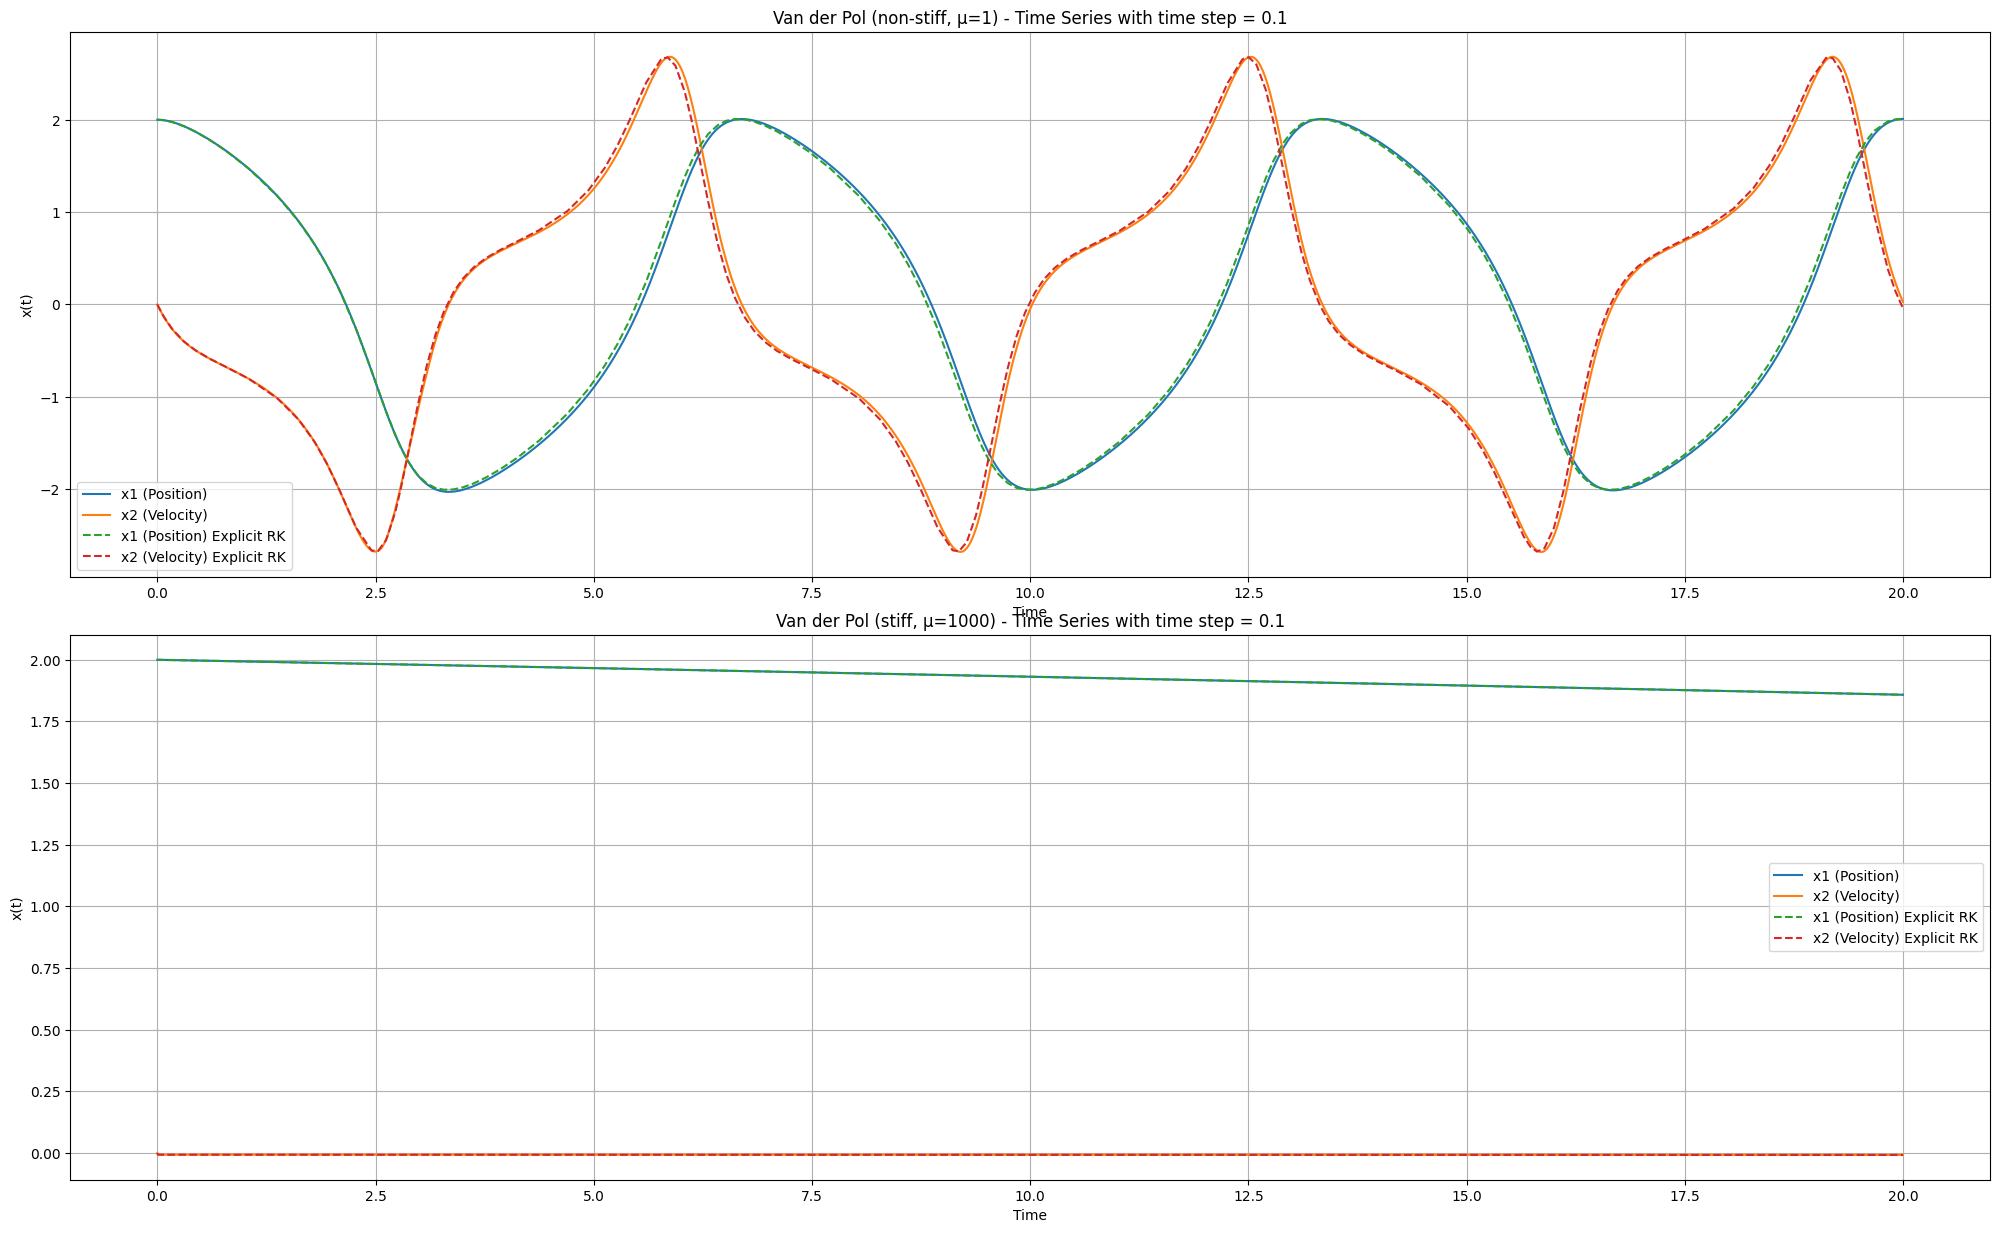

In [9]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0])  # Initial condition

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)


#Solver parameters
N = 2000
h0 = (t_span[1] - t_span[0]) / N


abs_tol = 1e-6
rel_tol = 1e-6

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_nonstiff_t, solution_fixed_nonstiff_x, solution_fixed_nonstiff_h = ExplicitRungeKuttaSolverAdaptive(f_nonstiff, t_span, x0, h0, solver, abs_tol, rel_tol)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_fixed_stiff_t, solution_fixed_stiff_x, solution_fixed_stiff_h = ExplicitRungeKuttaSolverAdaptive(f_stiff, t_span, x0, h0, solver, abs_tol, rel_tol)


#Plot two plots one for the non-stiff solutions and one for the stiff-solutions
plt.figure(figsize=(20,12))

# Plot time series for non-stiff
plt.subplot(2, 1, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x1 (Position)')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='x2 (Velocity)')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_nonstiff_t, solution_fixed_nonstiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout()

# Plot time series for stiff
plt.subplot(2, 1, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label = 'x1 (Position)')
plt.plot(sol_stiff.t, sol_stiff.y[1], label = 'x2 (Velocity)')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,0], '--', label = 'x1 (Position) Explicit RK')
plt.plot(solution_fixed_stiff_t, solution_fixed_stiff_x[:,1], '--', label = 'x2 (Velocity) Explicit RK')
plt.legend()
plt.title('Van der Pol (stiff, μ=1000) - Time Series with time step = 0.1')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.grid()
plt.tight_layout

## CSTR 3 state model

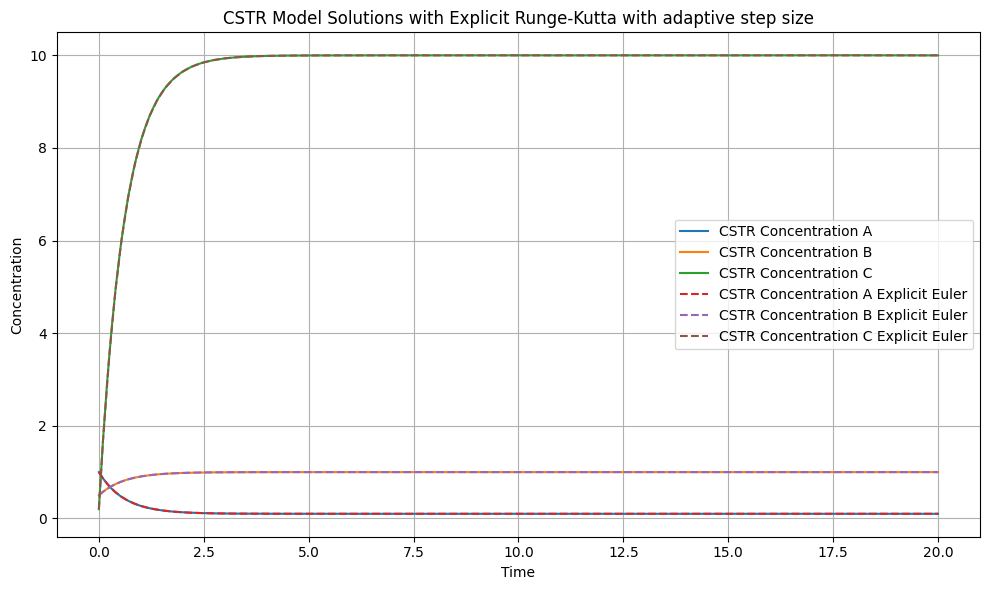

In [10]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = np.array([1.0, 0.5, 0.2])  # Initial conditions for CSTR model

#Solver parameters
N = 200
h0 = (t_span[1] - t_span[0]) / N

f, _ = CSTR_3state_model(params)

abs_tol = 1e-6
rel_tol = 1e-6

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))
solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitRungeKuttaSolverAdaptive(f, t_span, x0, h0, solver, abs_tol, rel_tol)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='CSTR Concentration A')
plt.plot(sol.t, sol.y[1], label='CSTR Concentration B') 
plt.plot(sol.t, sol.y[2], label='CSTR Concentration C')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='CSTR Concentration A Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='CSTR Concentration B Explicit Euler', linestyle='--')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,2], label='CSTR Concentration C Explicit Euler', linestyle='--')
plt.title('CSTR Model Solutions with Explicit Runge-Kutta with adaptive step size')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()